# Visualisation

### 1.1 Feature importance

In [12]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Loading the preprocessed data to aid in creating visualizations
data_full = pd.read_csv('../data/curated/final_data_num.csv')

In [13]:
data_full.columns

Index(['price', 'bedrooms', 'bathrooms', 'parking', 'school_count',
       'hosipital_count', 'park_count', 'station_count', 'shopping_cen_count',
       'total_crime_count', 'dist_melb_cen', 'distance_to_nearest_stop',
       'Crime_Count_2024', 'Crime_Rate_2024', 'Crime_Count_2023',
       'Crime_Rate_2023', 'Crime_Count_2022', 'Crime_Rate_2022'],
      dtype='object')

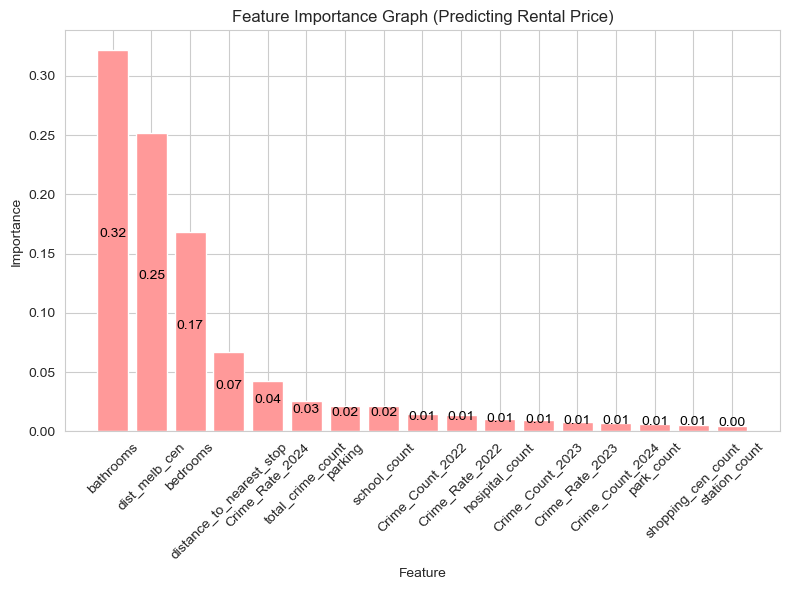

In [14]:
# Selecting the features that have an impact on rental prices
X = data_full.drop('price', axis=1) 
y = data_full['price'].values  

# Training the random forest model to identify which features contribute the most to the prediction
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Deriveingfeature importance scores from the Random Forest model
importance_scores = rf_model.feature_importances_

# Creating a DataFrame to rank features by importance and to store the feature names and their corresponding importance scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sorting the DataFrame in descending order of importance, so that the most important features appear first
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plotting the feature importance graph
plt.figure(figsize=(8, 6))
bars = plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='#FF9999')

# Adding annotations to each bar to display the importance value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='bottom', color='black')

# Setting titles and labels
plt.title('Feature Importance Graph (Predicting Rental Price)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)

# Adjusting layout to prevent overlap
plt.tight_layout()

# Show the plot to display the relative importance of each feature used in the random forest model
plt.show()

### 1.2 Correlation heatmap between features

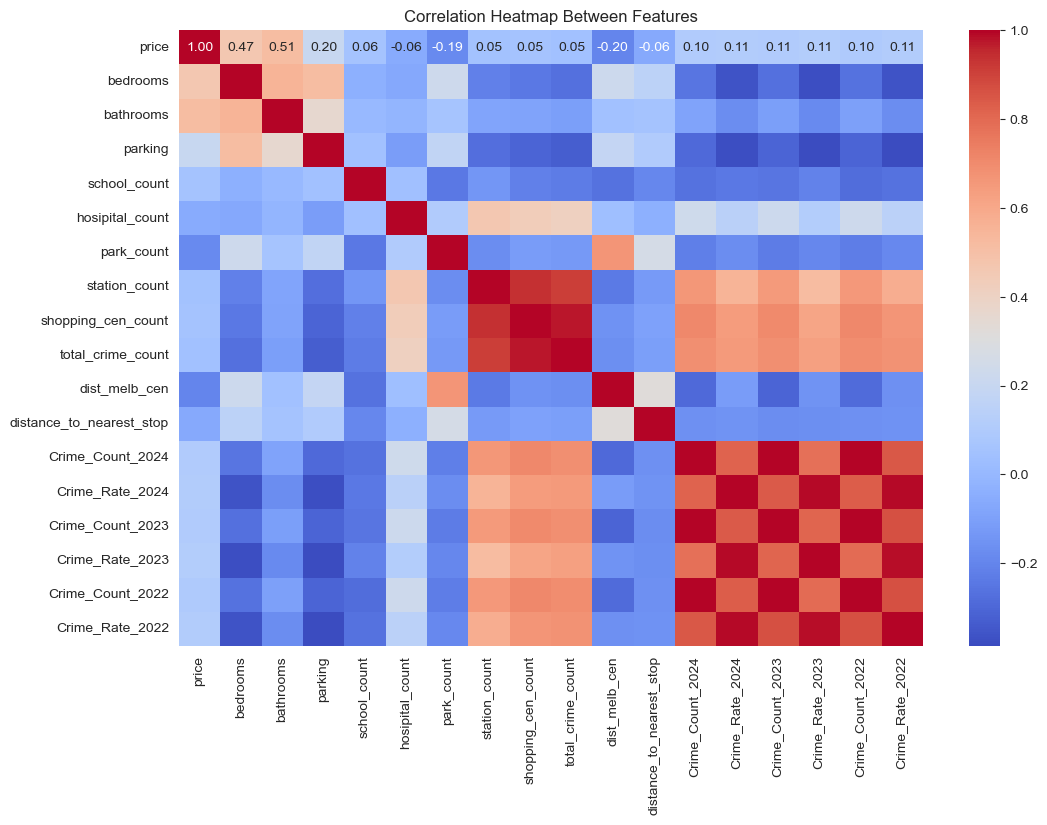

In [15]:
# Calculating the correlation matrix
corr_matrix = data_full.corr()

#Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap Between Features')
plt.show()

### 2.1 Affordable scores (updated) of top 10 affordable suburbs


In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('../data/curated/final_data_full.csv')

# Step 1: Normalize the Renting Price (Min-Max Scaling)
scaler = MinMaxScaler()
data['normalized_price'] = scaler.fit_transform(data[['price']])

# Step 2: Housing Calculation using the normalized price
data['Housing'] = data['normalized_price'] * 1.0

# Step 3: Food Calculation (Number of Shopping Centers * 85% + Number of Car Parks * 15%)
data['Food'] = (data['shopping_cen_count'] * 0.45) + (data['park_count'] * 0.15)

# Step 4: Transport Calculation
# Assuming columns for station_count, dist_melb_cen, and distance_to_nearest_stop
data['Transport'] = (data['station_count'] * 0.2) - (data['dist_melb_cen'] * 0.01) - (data['distance_to_nearest_stop'] * 0.4)

# Step 5: Affordable Index Calculation. Resource for weight giving: 
# <https://economy.id.com.au/melbourne/household-expenditure?sEndYear=2022>
data['Affordable_Index'] = (-data['Housing'] * 0.199) + (data['Food'] * 0.10) + (data['Transport'] * 0.107)

# Step 6: Group by suburb and calculate the mean Affordable Index for each suburb
# Ensure that there is a column called 'suburb'
suburb_affordability = data.groupby('addressLocality')['Affordable_Index'].mean().reset_index()

# Step 7: Get the top 10 most affordable suburbs
top_10_affordable_suburbs = suburb_affordability.nlargest(11, 'Affordable_Index')

# Display the top 10 most affordable suburbs
print(top_10_affordable_suburbs[['addressLocality', 'Affordable_Index']])


      addressLocality  Affordable_Index
110         Melbourne          0.173141
177       Warrnambool          0.038907
11   Ballarat Central          0.027403
65             Echuca          0.018543
179          Werribee          0.015993
113           Mildura          0.006800
172         Traralgon          0.006685
81          Frankston          0.005872
55          Dandenong          0.003964
92           Hastings          0.003316
2           Alfredton          0.000680


### 2.1.1 Print the outcome as bar chart

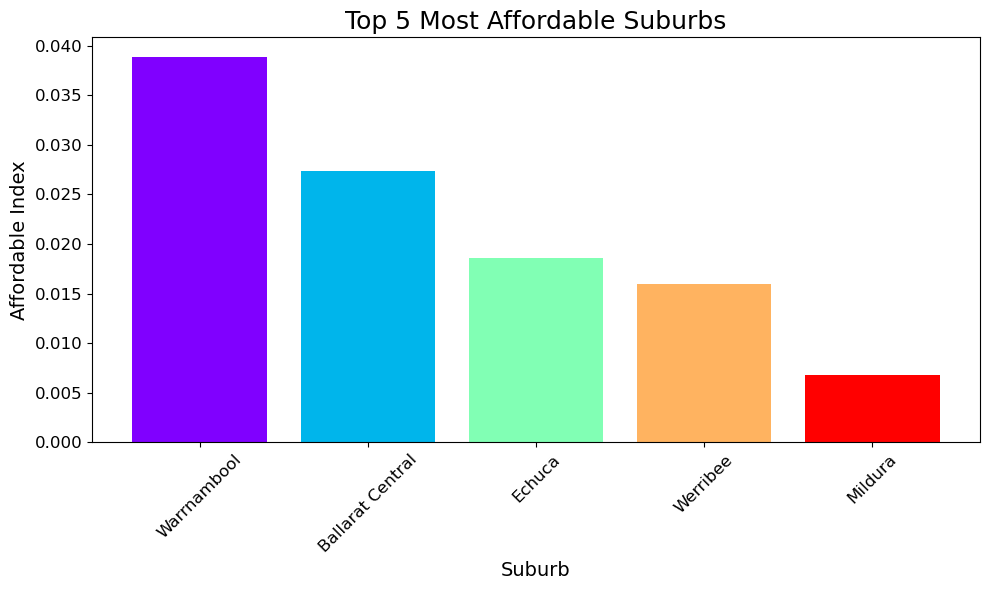

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a DataFrame for the top 8 suburbs and their Affordable Index
top_8_suburbs = pd.DataFrame({
    'addressLocality': ['Warrnambool', 'Ballarat Central', 'Echuca', 'Werribee', 'Mildura'],
    'Affordable_Index': [0.038907, 0.027403, 0.018543, 0.015993, 0.006800, ]
})

# Generate a rainbow color map based on the number of bars
colors = plt.cm.rainbow(np.linspace(0, 1, len(top_8_suburbs)))

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_8_suburbs['addressLocality'], top_8_suburbs['Affordable_Index'], color=colors)

# Increase font sizes
plt.xlabel('Suburb', fontsize=14)
plt.ylabel('Affordable Index', fontsize=14)
plt.title('Top 5 Most Affordable Suburbs', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


### 2.2 Liveability scores (updated) of top 10 affordable suburbs (weight of feature can be customized by clients)

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('../data/curated/final_data_full.csv')

# Step 5: Affordable Index Calculation
data['Affordable_Index'] = (-data['total_crime_count'] * 0.1) + \
                           (data['parking'] * 0.10) + \
                           (data['station_count'] * 0.10) + \
                           (data['hosipital_count'] * 0.15) + \
                           (data['shopping_cen_count'] * 0.15) + \
                           (data['bathrooms'] * 0.20) + \
                           (data['distance_to_nearest_stop'] * 0.10)

# Step 6: Group by suburb and calculate the mean Affordable Index for each suburb
# Ensure that there is a column called 'addressLocality'
suburb_affordability = data.groupby('addressLocality')['Affordable_Index'].mean().reset_index()

# Step 7: Get the top 10 most affordable suburbs
top_10_affordable_suburbs = suburb_affordability.nlargest(10, 'Affordable_Index')

# Display the top 10 most affordable suburbs
print(top_10_affordable_suburbs[['addressLocality', 'Affordable_Index']])


    addressLocality  Affordable_Index
142        Portland          1.766703
89         Hamilton          1.653700
77         Flinders          0.569797
20          Berwick          0.444705
110       Melbourne          0.424208
120      Mornington          0.415369
2         Alfredton          0.408912
81        Frankston          0.400970
175        Wantirna          0.385877
103             Kew          0.337975
